# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

result_1 = A @ e_1 
result_2 = A @ e_2
result_3 = A @ e_3

print(result_1)
print(result_2)
print(result_3)



[1 4 7]
[2 5 8]
[3 6 9]


Here we are multipying a 3x3 matrix by a 3X1 vector. In this case where are multiplying a vector by a split up identity matrix which won't produce the same result as the original vector. This only works when you multiply a identity matrix by a vector. The result will be a 3X1 vector which the result spits out. E_1 takes the first element of each row, e_2 takes the second element of each row, and e_3 takes the third element of each row, and so on and so forth. The result is logical.  

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [3]:
u = np.ones(3)
result_4 = A @ u
print(result_4)

[ 6. 15. 24.]


Because of how matrix multiplication works, you are multiplying each respective component and then, adding them together.In this case you are multiplying everything by "1". Because it is a 3X3 multiplied by a 3X1 vector, you get a 3X1 vector, where the answer is 1+2+3, 4+5+6, and 7+8+9.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [4]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])
result_5 = A @ x
print(result_5)

[-2  4 11]


Here you are multiplying the identity matrix by the vector. The result is the same vector as you multiply the vector by each of the rows of the identity matrix. In in this case 1,0,0 x -2,4,11 = -2 and 0,1,0 x -2,4,11 = 4 and so on a so forth for the last row. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [5]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])
result_6 = A @ x
print(result_6)

[11 -2  4]


Here you get the inverse. It is the same concept as I explained above so 0,0,1 X 4,-2,11 = 11, and so on and so forth. 

In [6]:
A = np.array([ [0,1,0],
              [0,1,0],
              [0,1,0]])
x = np.array([-2,4,11])

result_7 = A @ x
print(result_7)

[4 4 4]


Same concept as above. Because the second column in this case is all 1's, this means the resulting vector should be the second component which in this case is "4" which checks out.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [7]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [8]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

result_8 = A @ e_1
result_9 = A @ e_2
result_10 = A @ e_3

print(result_8)
print(result_9)
print(result_10)

[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]


This is similiar to part A, as I explained. Here are multiplying a vector by a split up identity matrix. In this case you are multiplying a 3 x 3 by 3x1 which produces a 3x1 vector, which the result checks out. 

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [9]:
for e in [e_1, e_2, e_3]:
    v = e.copy()
    for i in range(5):
        v = A @ v
    print(v)

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]


All three vectors are proportional to each other and align with the eigenvector of matrix A. The 5th power amplifies the vector in the direction of the dominate eigenvector

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [10]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [11]:
T

array([[0.25, 0.5 ],
       [0.75, 0.5 ]])

In [12]:
init_condition = np.array([1,0])
print(init_condition)

[1 0]


In [13]:
p_1 = T @ init_condition
print(p_1)

[0.25 0.75]


This is a 2 -state markov transition matrix. Each column give the proportion of the next state given the current state.

In [14]:
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


the two-step-ahead forecast of the state properations. In other words, it tells us the predicted probability distributions across the two states in period 2 (two steps ahead), given the initial condition.

In [15]:
n = 100
p = np.array([1,0])
for t in range(n):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0

Based off the loop, after continuously multiplying the by T, tbe vector settles down when  it reaches a stationary distribution, reaching [0.4,0.6]

In [16]:
n = 100000
state = 0
sim = []
for t in range(n):
    sim.append(state)
    prob = T[:,state]
    state = np.random.choice([0,1], p=prob)


sim

[0,
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 n

In [17]:
x = np.array(sim)
np.mean(x)

np.float64(0.60084)

Here you get a slightly different path but it converges to the same properational long term result of a stationary distribution of around .6

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [18]:
import pandas as pd
file_path = 'cville_weather.csv'
weather = pd.read_csv(file_path)
weather.head()
weather.info()
weather.columns.to_list()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB


['STATION',
 'NAME',
 'DATE',
 'DAPR',
 'DAPR_ATTRIBUTES',
 'MDPR',
 'MDPR_ATTRIBUTES',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'SNOW',
 'SNOW_ATTRIBUTES',
 'SNWD',
 'SNWD_ATTRIBUTES']

In [19]:
missing_report = weather.isna().sum()
print(missing_report)

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64


In [20]:
use_cols = ["DATE", "PRCP"]
weather2 = weather[use_cols].dropna(subset=["PRCP"])
weather2= weather2.sort_values("DATE").reset_index(drop=True)  # here i sort the values by date for ease of analysis 
weather2.head()

weather2["rain"] = (weather2["PRCP"] > 0).astype(int) # here is the code to add that extra column.
weather2.head()



,DATE,PRCP,rain
0,2024-01-04,0.03,1
1,2024-01-07,1.08,1
2,2024-01-08,0.00,0
3,2024-01-09,0.24,1
4,2024-01-10,3.00,1


In [21]:

weather2["prev_rain"] = weather2["rain"].shift(1)

contingency = pd.crosstab(weather2["prev_rain"], weather2["rain"])
print("Contingency Table:\n", contingency, "\n")

T = contingency.div(contingency.sum(axis=1), axis=0)
print("Transition Matrix:\n", T, "\n")



Contingency Table:
 rain         0    1
prev_rain          
0.0        173   47
1.0         47  131 

Transition Matrix:
 rain              0         1
prev_rain                    
0.0        0.786364  0.213636
1.0        0.264045  0.735955 



Based of the contigency table tehre is a 73.6% chance of rain if it was rainy yesterday, and a 26.4% chance of rain if it was clear yesterday. 

In [22]:
import numpy as np

v_clear = np.array([1.0, 0.0]) # 100% of being clear
v_rainy = np.array([0.0, 1.0]) # 100% of being rainy

def iterate_forecast(T, v, steps=10):
    hist = [v]
    for _ in range(steps):
        v = v @ T          
        hist.append(v)
    return np.vstack(hist)


T_mat = T.values 

forecast_clear = iterate_forecast(T_mat, v_clear, steps=10)
forecast_rainy = iterate_forecast(T_mat, v_rainy, steps=10)

print("Starting clear:\n", forecast_clear[:6])
print("Starting rainy:\n", forecast_rainy[:6])


Starting clear:
 [[1.         0.        ]
 [0.78636364 0.21363636]
 [0.67477737 0.32522263]
 [0.61649378 0.38350622]
 [0.58605117 0.41394883]
 [0.57015042 0.42984958]]
Starting rainy:
 [[0.         1.        ]
 [0.26404494 0.73595506]
 [0.40196055 0.59803945]
 [0.47399645 0.52600355]
 [0.51162215 0.48837785]
 [0.53127476 0.46872524]]


Based off of this analysis, it seems like it will be the result will converge to around a 57% of being clear and 43% of being rainy, given it was a clear day yesterday, and a 53% of being clear and 47% of being rainy given it was rainy yesterday. the starting rainy is a forcast distibution after around 5 steps or so.

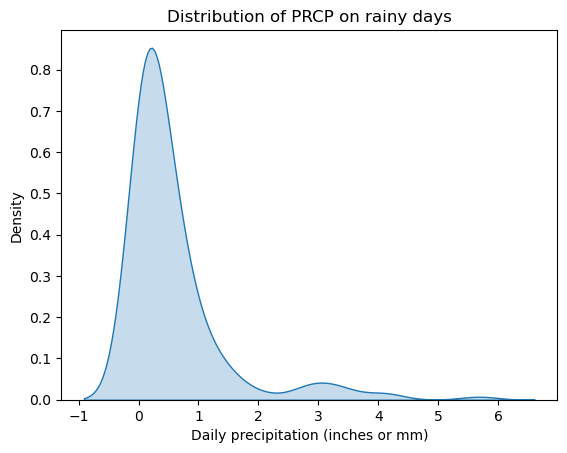

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=weather2[weather2["rain"] == 1], x="PRCP", fill=True)
plt.title("Distribution of PRCP on rainy days")
plt.xlabel("Daily precipitation (inches or mm)")
plt.show()

From this KDE plot, we can see that this plot is right-skewed. This means that there are more days with a light amount of rain and fewer days with heavy amount of rain.

One way of improving the model is to account for season and monthy. Currently this simulation does not account for that. As a oppose to simply including the date, you can include the month and create a seperate matrix based off of that. 

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print(len(data))
data


1000


[0     Outside Manhattan
 0     Outside Manhattan
 0     Outside Manhattan
 0     Outside Manhattan
 0     Outside Manhattan
             ...        
 29                 SoHo
 29                 SoHo
 13    Greenwich Village
 3               Chelsea
 3               Chelsea
 Name: nbhd, Length: 26026, dtype: object,
 22              Midtown
 17             Kips Bay
 17             Kips Bay
 7          East Village
 7          East Village
             ...        
 34      Upper East Side
 34      Upper East Side
 34      Upper East Side
 34      Upper East Side
 0     Outside Manhattan
 Name: nbhd, Length: 30184, dtype: object,
 3               Chelsea
 34      Upper East Side
 34      Upper East Side
 0     Outside Manhattan
 0     Outside Manhattan
             ...        
 20      Lower East Side
 20      Lower East Side
 34      Upper East Side
 34      Upper East Side
 7          East Village
 Name: nbhd, Length: 21202, dtype: object,
 13    Greenwich Village
 6           East Har

In [25]:
data_reset = [series.reset_index(drop=True) for series in data]
df = pd.concat(data_reset, axis=1, ignore_index=True)
df.columns = [f'series_{i}' for i in range(len(data))]
print("DataFrame shape:", df.shape)
print("First few rows:\n", df.head()) ## here i convert from a list into a new dataframe for ease of analysis

DataFrame shape: (38344, 1000)
First few rows:
             series_0      series_1           series_2           series_3  \
0  Outside Manhattan       Midtown            Chelsea  Greenwich Village   
1  Outside Manhattan      Kips Bay    Upper East Side        East Harlem   
2  Outside Manhattan      Kips Bay    Upper East Side            Midtown   
3  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   
4  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   

            series_4           series_5         series_6         series_7  \
0  Battery Park City            Midtown  Upper East Side  Upper West Side   
1       East Village            Midtown  Upper East Side  Upper East Side   
2       East Village            Midtown  Upper East Side  Upper East Side   
3           Gramercy  Flatiron District  Upper East Side          Midtown   
4           Gramercy       East Village          Midtown          Midtown   

            series_8           s

In [26]:
# Cleaing the state space. 
# Get unique neighborhoods from all columns. Outside of manhtattan is included as one of the states. 
all_neighborhoods = set()
for col in df.columns:
    all_neighborhoods.update(df[col].str.lower().str.strip().dropna())
states = list(all_neighborhoods)
S = len(states)
print("\nState space (Manhattan neighborhoods):", states)
print("Number of states:", S)


State space (Manhattan neighborhoods): ['outside manhattan', 'battery park city', 'soho', 'midtown', 'little italy', 'gramercy', 'central park', 'two bridges', 'tribeca', 'marble hill', 'chelsea', "randall's island", 'flatiron district', 'morningside heights', 'financial district', 'lower east side', "hell's kitchen", 'civic center', 'murray hill', 'noho', 'roosevelt island', 'upper east side', 'east village', 'governors island', 'kips bay', 'west village', 'greenwich village', 'theater district', 'upper west side', 'liberty island', 'washington heights', 'east harlem', 'chinatown', 'stuyvesant town', 'harlem', 'inwood', 'ellis island', 'nolita']
Number of states: 38


The state space consists of 38 neighborhoods in manhattan, one of which is outside of manhattan - which makes it 37 neighborhoods within Manhattan. I cleaned the sequence by using a foreloop to iterate and lower case, strip the whitespace, and drop the NaN values from the state space. 


Transition Matrix:
                      outside manhattan  battery park city  soho  midtown  \
outside manhattan                 0.51               0.05  0.07     0.06   
battery park city                 0.01               0.26  0.02     0.00   
soho                              0.02               0.05  0.25     0.01   
midtown                           0.08               0.07  0.08     0.36   
little italy                      0.00               0.00  0.00     0.00   
gramercy                          0.01               0.01  0.02     0.02   
central park                      0.00               0.00  0.00     0.01   
two bridges                       0.00               0.00  0.00     0.00   
tribeca                           0.02               0.12  0.04     0.01   
marble hill                       0.00               0.00  0.00     0.00   
chelsea                           0.03               0.07  0.09     0.07   
randall's island                  0.00               0.00  0.00    

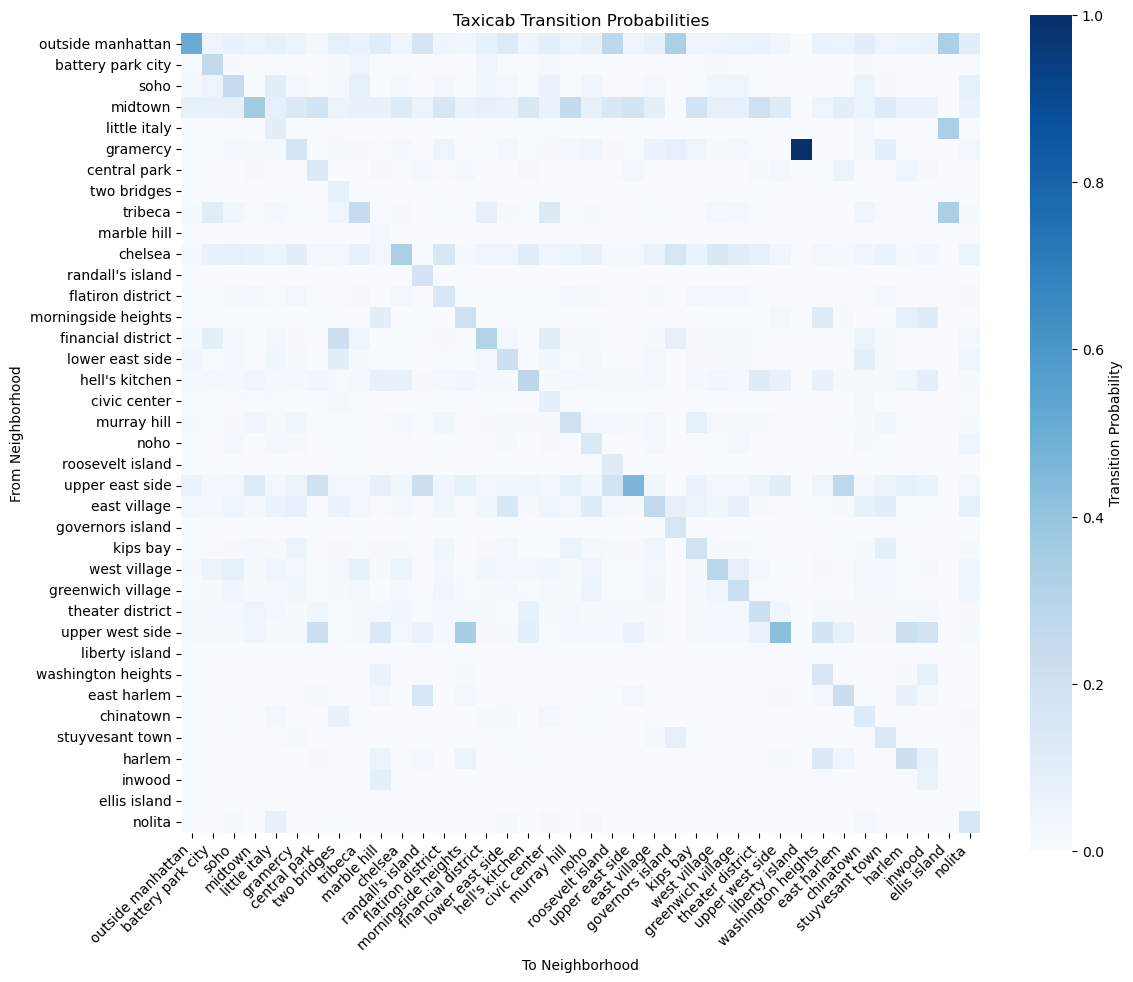


Most common routes:
liberty island -> gramercy: 1.00
outside manhattan -> outside manhattan: 0.51
upper east side -> upper east side: 0.46
upper west side -> upper west side: 0.42
midtown -> midtown: 0.36
morningside heights -> upper west side: 0.35
chelsea -> chelsea: 0.33
ellis island -> little italy: 0.33
ellis island -> outside manhattan: 0.33
ellis island -> tribeca: 0.33


In [27]:
# Transition matrix and heatmap

transition_count = np.zeros((S, S))
for col in df.columns:
    col_seq = df[col].str.lower().str.strip().dropna()
    col_seq = col_seq[col_seq.isin(all_neighborhoods)].values
    for t in range(1, len(col_seq)):
        if col_seq[t-1] in states and col_seq[t] in states:
            index_from = states.index(col_seq[t-1])
            index_to = states.index(col_seq[t])
            transition_count[index_to, index_from] += 1

# Transition probabilities
sums = transition_count.sum(axis=0, keepdims=True)
transition_prob = np.divide(transition_count, sums, out=np.zeros_like(transition_count), where=sums!=0)
transition_df = pd.DataFrame(np.round(transition_prob, 2), index=states, columns=states)
print("\nTransition Matrix:\n", transition_df)

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(transition_prob, cmap='Blues', square=True, xticklabels=states, yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})
plt.title('Taxicab Transition Probabilities')
plt.xlabel('To Neighborhood')
plt.ylabel('From Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# common routes
print("\nMost common routes:")
transition_flat = transition_prob.flatten()
top_indices = np.argsort(transition_flat)[-10:][::-1]
for idx in top_indices:
    i, j = divmod(idx, S)
    print(f"{states[j]} -> {states[i]}: {transition_prob[i, j]:.2f}")

 A heatmap visualizes these probabilities, with darker shades indicating higher likelihoods. As you can see, upper east side, upper west side, midtown, and ellis island are all popular neighborhoods. This means that taxi cars tend to stay in those specific areas. Off diagonal areas like Ellis island show frequent trips between neighborhoods. 

# Why Taxis are most likely order 1

Taxicabs are a first-order Markov chain because the next destination depends primarily on the current location and immediate factors like passenger demand or proximity. Higher-order models (e.g., order 2) are unnecessary b/c they add complexity without significant predictive gain.

In [28]:
try:
    hk_idx = states.index("hell's kitchen")
except ValueError:
    print("Warning: Hell's Kitchen not in states. Using first state instead.")
    hk_idx = 0
initial = np.zeros(S)
initial[hk_idx] = 1
print("\nForecasts from Hell's Kitchen:")
vec = initial
for i in range(10):
    vec = transition_prob @ vec
    if i+1 in [2, 3, 5, 10]:
        top3 = np.argsort(vec)[-3:][::-1]
        print(f"After {i+1} trips:", {states[idx]: round(vec[idx], 2) for idx in top3})


Forecasts from Hell's Kitchen:
After 2 trips: {'midtown': np.float64(0.17), "hell's kitchen": np.float64(0.12), 'chelsea': np.float64(0.11)}
After 3 trips: {'midtown': np.float64(0.17), 'upper east side': np.float64(0.11), 'chelsea': np.float64(0.1)}
After 5 trips: {'midtown': np.float64(0.17), 'upper east side': np.float64(0.12), 'outside manhattan': np.float64(0.1)}
After 10 trips: {'midtown': np.float64(0.17), 'upper east side': np.float64(0.12), 'outside manhattan': np.float64(0.1)}


## Forecasting from Hell's Kitchen

the probability distribution after 2, 3, 5, and 10 trips is shown above After 2 trips, the top neighborhoods are Midtown (0.17), Hell’s Kitchen (0.12), and Chelsea (0.11). By 10 trips, the distribution stabilizes, with Midtown (0.17), Upper East Side (0.12), and outside Manhattan (0.10) being the most likely, showing a shift toward high-demand areas which makes sense

In [29]:
vec = np.ones(S) / S
for i in range(50):
    vec_new = transition_prob @ vec
    if np.max(np.abs(vec_new - vec)) < 0.001:
        print(f"\nConverged at step {i+1}")
        break
    vec = vec_new
top5 = np.argsort(vec)[-5:][::-1]
print("Long-run distribution (top 5 neighborhoods):", {states[idx]: round(vec[idx], 2) for idx in top5})


Converged at step 7
Long-run distribution (top 5 neighborhoods): {'midtown': np.float64(0.17), 'upper east side': np.float64(0.12), 'outside manhattan': np.float64(0.1), 'chelsea': np.float64(0.09), 'upper west side': np.float64(0.08)}


## Long-run distribution

Here the markov chain converges to a steady state distribution, which is the long-run distribution in 7 steps. Cabs spend most of their time in midtown, upper east side, upper west side and Chelsea, showing these areas are high-demanded areas where passengers go to and from. 